# Comparing Clustering Algorithm

Saint-Maxent Juliette 14/10/2025

In [3]:
#import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load "Data_to_cluster.csv" and describe the data it contains

In [4]:
data=pd.read_csv("data_to_cluster.csv",delimiter=';',decimal=',')
data.describe()

,X,Y
count,800.000000,800.000000
mean,10.809343,4.067838
std,5.360266,3.831002
min,0.000000,-5.029053
25%,6.504486,1.720596
50%,10.716147,4.707356
75%,15.288797,7.161121
max,21.677068,11.232087


Nous obtenons plein d'informations qui décrivent notre csv le nombre de lignes, la moyenne des deux colonnes, le min le max ...

Plot the 2D Data

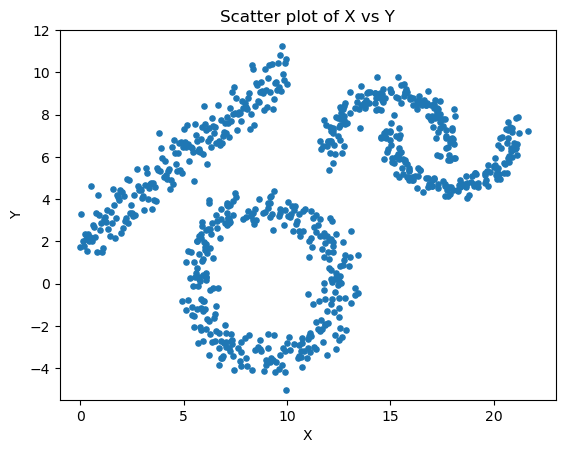

In [5]:

plt.scatter(data.X, data.Y,s=14)
plt.axis([-1, 23, -5.5,12 ])
plt.title('Scatter plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Dans le graph on peut voir plusieurs figures differentes que forment les points comme un cercle,une ligne, et deux demi cercles encastrés l'un à l'autre.

Apply the different clustering algorithms from "scikit.cluster" and plot the result

### KMeans

Sépare les données en cluster ici 4 clusters

c:\Users\julie\anaconda3\envs\mon_environnement\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Y')

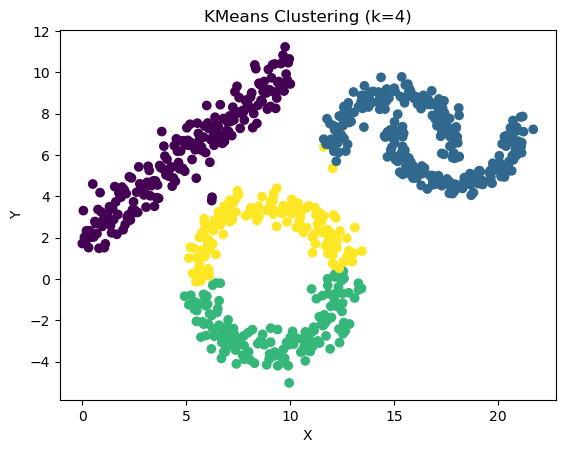

In [6]:
# Pour tous les algorithmes on va :
from sklearn.cluster import KMeans # Importer l'algorithme
model = KMeans(n_clusters=4) # Créer un model grace à l'algorithme et ses paramètres
model.fit(data) 
clusters = model.predict(data) # Predire le résultat obtention d'un tableau avec differents chiffres selon le cluster
plt.scatter(data.X, data.Y, c=clusters) # Afficher les points avec sa couleur de cluster
plt.title('KMeans Clustering (k=4)') # Titre
# Nom des Axes :
plt.xlabel('X')
plt.ylabel('Y')

On arrive à imaginer les points centrés de chaque cluster, mais aucune des figures a des points de la même couleur  

On va tester K-means avec 3 clusters

c:\Users\julie\anaconda3\envs\mon_environnement\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Y')

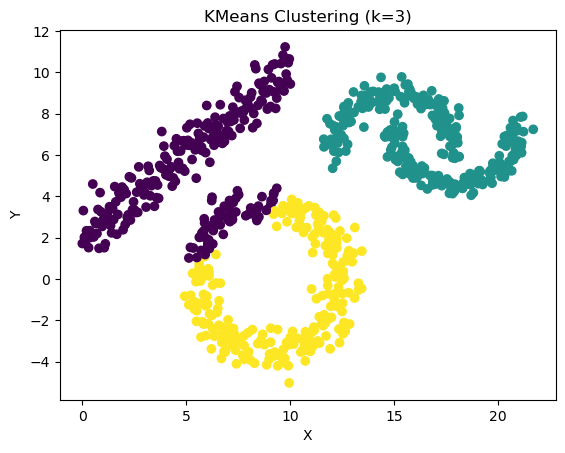

In [7]:
model2 = KMeans(n_clusters=3)
model2.fit(data)
clusters = model2.predict(data)
plt.scatter(data.X, data.Y, c=clusters)
plt.title('KMeans Clustering (k=3)')
plt.xlabel('X')
plt.ylabel('Y')

Avec moins de cluster on obtient bien la ligne en une couleur, les deux demis cercles pareil mais sur le cercle il y a un débordement de la couleur de la ligne

### Mini Batch KMeans

Mini Batch Kmeans traite des sous ensembles séléctionnés au hasard et définit les points centraux des clusters

c:\Users\julie\anaconda3\envs\mon_environnement\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Text(0, 0.5, 'Y')

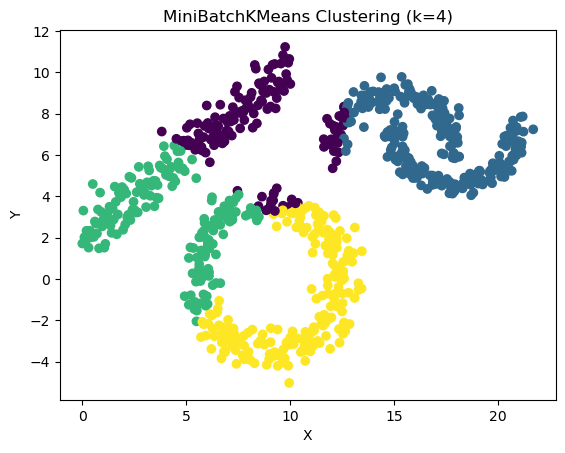

In [8]:
from sklearn.cluster import MiniBatchKMeans
model_MB = MiniBatchKMeans(n_clusters=4)
model_MB.fit(data)
clusters = model_MB.predict(data)
plt.scatter(data.X, data.Y, c=clusters,)
plt.title('MiniBatchKMeans Clustering (k=4)')
plt.xlabel('X')
plt.ylabel('Y')

En traitant des sous ensembles on commence a voir les deux demi cercle se separer

### Affinity Propagation

L'algorithme va permettre aux points de communiquer entre eux et de définir eux même le point central d'un cluster

Text(0, 0.5, 'Y')

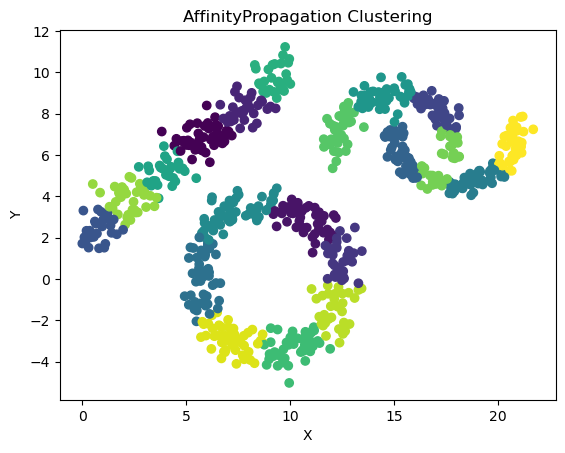

In [9]:
from sklearn.cluster import AffinityPropagation
model_Affi = AffinityPropagation()
model_Affi.fit(data)
clusters = model_Affi.predict(data)
plt.scatter(data.X, data.Y, c=clusters)
plt.title('AffinityPropagation Clustering')
plt.xlabel('X')
plt.ylabel('Y')

Pas efficace car on ne peut pas définir le nombre de cluster trop de sous ensembles

### Mean Shift Clustering

Cet algorithme utilise les densitées locales n'a pas besoin de spécifier le nombre de cluster

Text(0, 0.5, 'Y')

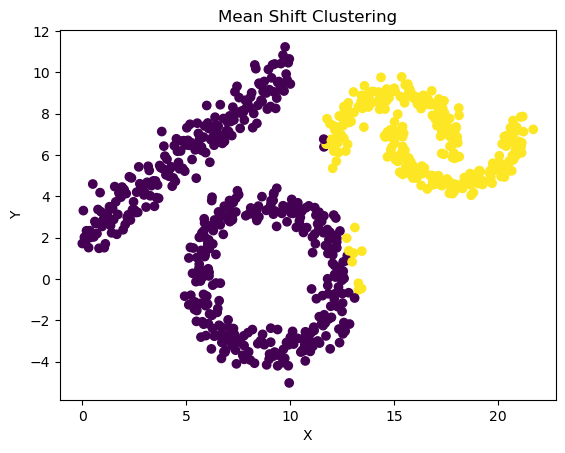

In [10]:
from sklearn.cluster import MeanShift
model_MS = MeanShift()
model_MS.fit(data)
clusters = model_MS.predict(data)
plt.scatter(data.X, data.Y, c=clusters)
plt.title('Mean Shift Clustering')
plt.xlabel('X')
plt.ylabel('Y')

Ici aussi on ne peut pas definir le nombre de cluster comme la ligne et le cercle ou les deux demi cercles sont rapprochés l'un de l'autre il y a seulement deux clusters 

### Spectral Clustering

Spectral Clustering regroupe les points en analysant les connexions entre eux souvent utilisé pour les formes non convexes.

c:\Users\julie\anaconda3\envs\mon_environnement\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Y')

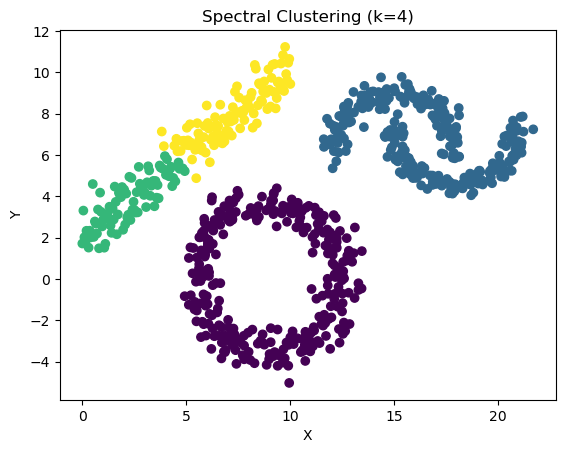

In [11]:
from sklearn.cluster import SpectralClustering
model_S = SpectralClustering(n_clusters=4)
model_S.fit(data)
clusters = model_S.labels_
plt.scatter(data.X, data.Y, c=clusters)
plt.title('Spectral Clustering (k=4)')
plt.xlabel('X')
plt.ylabel('Y')

Pas pratique pour les deux demi cercles donc le 4éme cluster est defini "au hasard"

 ### Ward Agglomerative Clustering

Agglomerative Clustering est une méthode qui fonctionne de manière récursive, en fusionnant progressivement les clusters les plus proches.


Ici on utilise la liaison Ward: Minimise la variance des clusters fusionnés.

Text(0, 0.5, 'Y')

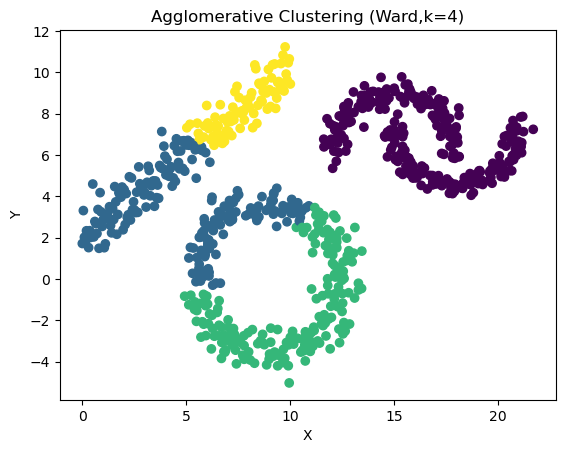

In [12]:
from sklearn.cluster import AgglomerativeClustering
model_WA = AgglomerativeClustering(n_clusters=4)
model_WA.fit(data)
clusters = model_WA.labels_
plt.scatter(data.X, data.Y, c=clusters)
plt.title('Agglomerative Clustering (Ward,k=4)')
plt.xlabel('X')
plt.ylabel('Y')

### Agglomerative Clustering

Ici on utilise la liaison Average: utilise la moyenne des distances de chaque observation entre deux ensembles.

Text(0, 0.5, 'Y')

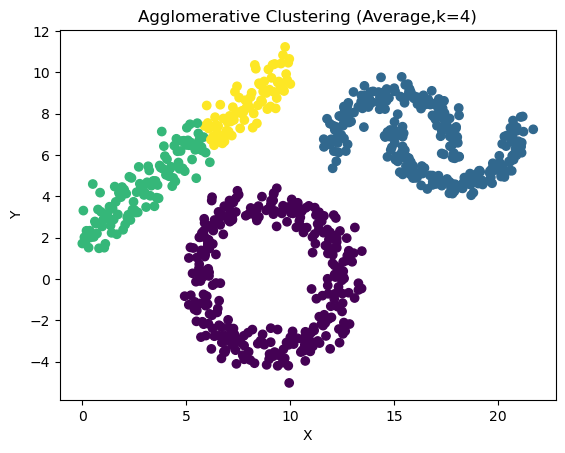

In [13]:
from sklearn.cluster import AgglomerativeClustering
model_A = AgglomerativeClustering(n_clusters=4,linkage='average')
model_A.fit(data)
clusters = model_A.labels_
plt.scatter(data.X, data.Y, c=clusters)
plt.title('Agglomerative Clustering (Average,k=4)')
plt.xlabel('X')
plt.ylabel('Y')

Toujours le meme probleme pour les deux demi cercles

### DBSCAN

L'algorithme permet de séparer les régions selon ses voisins proches à partir d'un cercle de rayon (eps), pour être un point central il faut qu'il y ai au moins un certains nombre de point dans son cercle(min_sample)

Pour ces données nous allons essayer de séparer les deux arcs de cercle pour cela on estime la distance des deux points les plus proches

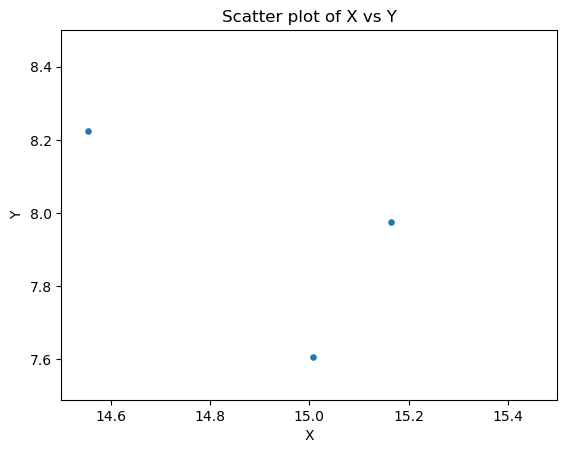

Distance entre les deux points les plus proches 0.6591467426016602


In [14]:
import math
plt.scatter(data.X, data.Y,s=14)
plt.axis([14.5, 15.5, 7.49,8.5])# zoom sur les données pour retrouvé dans la data les coordonées
plt.title('Scatter plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
dist=math.sqrt(pow(15.163536276120915-14.552940290181212,2)+pow(7.976238767259183-8.224526846386436,2))
print("Distance entre les deux points les plus proches",dist)# calcul de la distance entre les deux points

Pour Séparer les deux clusters il va falloir prendre un eps inferieur a 0.65 pour cela on va prendre 0.6

Text(0, 0.5, 'Y')

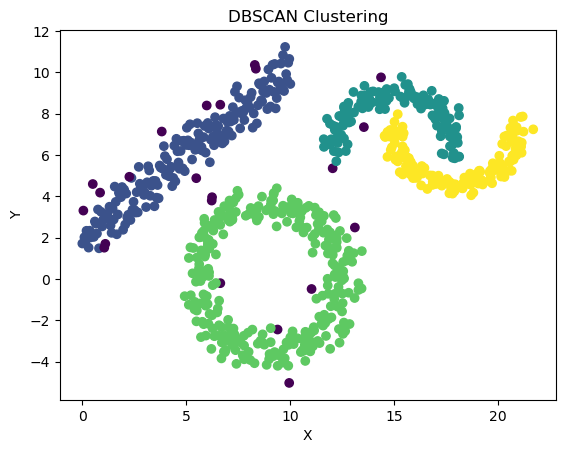

In [15]:
from sklearn.cluster import DBSCAN
model_DB = DBSCAN(eps=0.6,min_samples=5) # eps correspond a un rayon qui considère que tout les points a l'interieur de ce rayon sont des voisins
model_DB.fit(data)
clusters = model_DB.labels_
plt.scatter(data.X, data.Y, c=clusters)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')

Pour l'instant la meilleure séparation, grâce a un paramètre spécialisé pour eps on voit bien nos 4 clusters differents

### HDBSCAN Clustering

L'algorithme HDBScan va regrouper les points de cluster par sa densité locale avec l'attribut Min_cluster_size (nombre minimum de points pour que ce soit considéré comme un cluster) et min_sample (calcul la distance avec ses voisins: pour savoir si le point est dense ou pas )

Text(0, 0.5, 'Y')

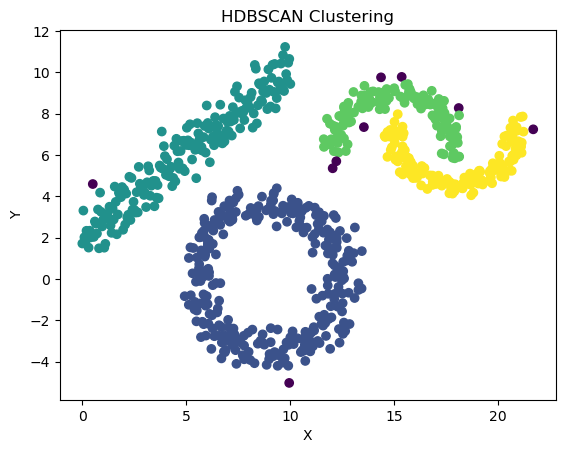

In [16]:
from sklearn.cluster import HDBSCAN
model_HDB = HDBSCAN(min_cluster_size=35,min_samples=5)
model_HDB.fit(data)
clusters = model_HDB.labels_
plt.scatter(data.X, data.Y, c=clusters)
plt.title('HDBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')

Amélioration de DBScan moins de bruit

### Optics Clustering

OPTICS explore les données en partant des zones les plus denses, et les étend progressivement vers les points proches.

Ici on va partir du faite qu'il faut qu'une zone soit dense de 35 points

Text(0, 0.5, 'Y')

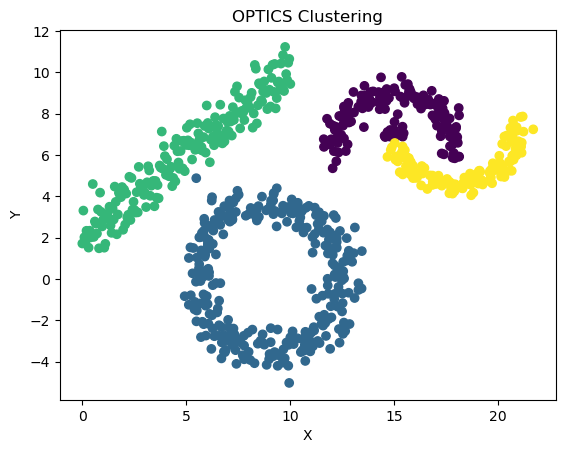

In [17]:
from sklearn.cluster import OPTICS
model_OPT = OPTICS(min_samples=35)
model_OPT.fit(data)
clusters = model_OPT.labels_
plt.scatter(data.X, data.Y, c=clusters)
plt.title('OPTICS Clustering')
plt.xlabel('X')
plt.ylabel('Y')

Aucun bruit, juste un demi cercle empiète sur l'autre

### Birch Clustering

Birch est un algorithme de clustering hiérarchique qui construit des arbres de données

Text(0, 0.5, 'Y')

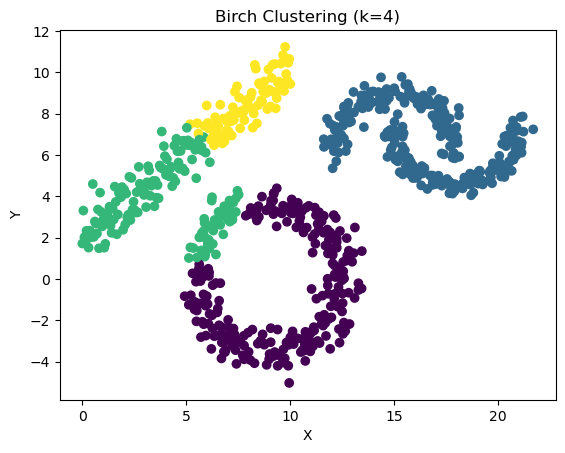

In [18]:
from sklearn.cluster import Birch
model_B = Birch(n_clusters=4)
model_B.fit(data)
clusters = model_B.predict(data)
plt.scatter(data.X, data.Y, c=clusters)
plt.title('Birch Clustering (k=4)')
plt.xlabel('X')
plt.ylabel('Y')

Encore une fois problème sur les deux demi cercles

### Gaussian Mixture

La méthode Gaussian Mixture se base sur les probabilités. Elle suppose que les données sont générées par un mélange de plusieurs lois normales (gaussiennes).

Random state permet de géneré un nombre aléatoire pour initialiser les centres gaussiens

c:\Users\julie\anaconda3\envs\mon_environnement\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Y')

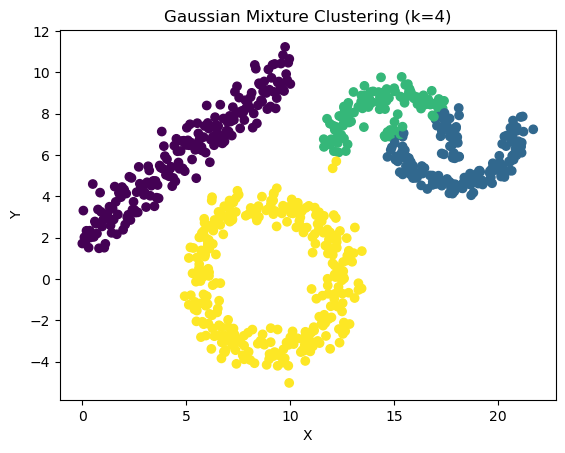

In [19]:
from sklearn.mixture import GaussianMixture
model_GM = GaussianMixture(n_components=4,random_state=42)
model_GM.fit(data)
clusters = model_GM.predict(data)
plt.scatter(data.X, data.Y, c=clusters)
plt.title('Gaussian Mixture Clustering (k=4)')
plt.xlabel('X')
plt.ylabel('Y')

Bon algorithme pas de bruit, juste un petit problème sur les deux demi cercles